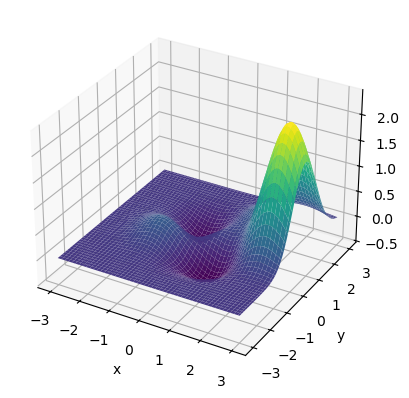

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

a1, a2, a3 = 1.5, 0.6, 0.7
a4, a5, a6 = 0.8, 1.2, 0.99

# linear spacing for domain of functions
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x,y)

# surface
Z = (a1*X*Y - a2*X**3 - a3*Y**2) *np.exp(-X**2 - Y**2) + (a4*X**2 - a5*X*Y + a6*Y**2)*np.exp(-(X-2)**2 -(Y-1)**2)

plt.close("all")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()